In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [7]:
img_path = '/home/riccardo/Visual_Studio_Code/Grain-segmentation_prjt/dataset-full/pearlite_microstructure_img_cropped_V3_cleaned_yolo/2-Figure1-1 (1)_cropped_6.png'


In [8]:
model = YOLO('/home/riccardo/Visual_Studio_Code/Grain-segmentation_prjt/dataset-full/100_img_manual_dataset/yolo_model/train200/weights/best.pt')

In [9]:
det = model.predict(img_path)


image 1/1 /home/riccardo/Visual_Studio_Code/Grain-segmentation_prjt/dataset-full/pearlite_microstructure_img_cropped_V3_cleaned_yolo/2-Figure1-1 (1)_cropped_6.png: 224x224 Pearlite 1.00, Martensite 0.00, 2.7ms
Speed: 28.7ms preprocess, 2.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [20]:
det[0]

ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Martensite', 1: 'Pearlite'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 85,  82,  79],
        [ 97,  93,  91],
        [146, 142, 139]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 82,  79,  76],
        [ 88,  84,  82],
        [137, 132, 130]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 79,  76,  74],
        [ 84,  81,  78],
        [136, 131, 128]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

  

In [17]:
det[0].probs

ultralytics.engine.results.Probs object with attributes:

data: tensor([7.6484e-05, 9.9992e-01], device='cuda:0')
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(0.9999, device='cuda:0')
top5: [1, 0]
top5conf: tensor([9.9992e-01, 7.6484e-05], device='cuda:0')

In [11]:
print(det[0].names)
det[0].probs

{0: 'Martensite', 1: 'Pearlite'}


ultralytics.engine.results.Probs object with attributes:

data: tensor([7.6484e-05, 9.9992e-01], device='cuda:0')
orig_shape: None
shape: torch.Size([2])
top1: 1
top1conf: tensor(0.9999, device='cuda:0')
top5: [1, 0]
top5conf: tensor([9.9992e-01, 7.6484e-05], device='cuda:0')

In [12]:
type(det[0].probs.data)

torch.Tensor

In [22]:
det[0].probs.top1conf

tensor(0.9629, device='cuda:0')

[[          0     0.48813     0.49098     0.72923]
 [    0.50352     0.48852           1     0.72951]
 [          0      0.7347     0.49378     0.97371]
 [    0.50328     0.73463           1     0.97098]
 [    0.50898     0.24551     0.99413     0.47519]
 [          0     0.24382      0.4974     0.48396]
 [     0.5004           0           1     0.23787]
 [          0           0     0.49668     0.23959]]


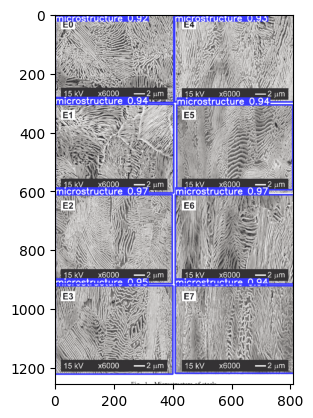

In [ ]:
det_array = det[0].plot()
plt.imshow(det_array)
bbox_coordinates = det[0].boxes.cpu().numpy().xyxyn
print(bbox_coordinates)